# PROBLEM STATMENT

The problem statement for this dataset is to build a classification model that can predict whether a person or business is likely to default on a loan or not. The model should be able to accurately classify borrowers into two categories: good credit risk and bad credit risk.

#IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd

# LOADING THE DATA


In [ ]:
df_train = pd.read_csv('/content/credit_train.csv')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df_train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


# DATA UNDERSTANDING (EDA)

In [ ]:
# shape of the data
df_train.shape

(100000, 28)

In [ ]:
# summary of the data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

# Dropping the columns which are out of scope for model building 

In [ ]:
d_col = ['ID','Customer_ID','Month','Name','SSN','Monthly_Inhand_Salary','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Mix',
         'Credit_Utilization_Ratio','Amount_invested_monthly']
drop_df_train = df_train.drop(d_col , axis=1).copy()


In [ ]:
drop_df_train

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,NaN,809.98,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,NaN,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,NaN,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


# CHECKING FOR NULL VALUES

In [ ]:
# checking for null values
drop_df_train.isnull().sum()

Age                          0
Occupation                   0
Annual_Income                0
Delay_from_due_date          0
Num_of_Delayed_Payment    7002
Outstanding_Debt             0
Credit_History_Age        9030
Payment_of_Min_Amount        0
Total_EMI_per_month          0
Payment_Behaviour            0
Monthly_Balance           1200
Credit_Score                 0
dtype: int64

In [ ]:
for cols in drop_df_train:
  if drop_df_train[cols].dtypes=='object':
    drop_df_train = drop_df_train.fillna(drop_df_train[cols].value_counts().index[0])

In [ ]:
drop_df_train.isnull().sum()

Age                       0
Occupation                0
Annual_Income             0
Delay_from_due_date       0
Num_of_Delayed_Payment    0
Outstanding_Debt          0
Credit_History_Age        0
Payment_of_Min_Amount     0
Total_EMI_per_month       0
Payment_Behaviour         0
Monthly_Balance           0
Credit_Score              0
dtype: int64

In [ ]:
df_new = pd.DataFrame(drop_df_train)

In [ ]:
df_new

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,38,809.98,38,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,38,809.98,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,23,7,502.38,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,Poor
99996,25,Mechanic,39628.99,18,7,502.38,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,Poor
99997,25,Mechanic,39628.99,27,6,502.38,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,Poor
99998,25,Mechanic,39628.99,20,38,502.38,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
for i in df_new:
  print('\n',i,df_new[i].unique())


 Age ['23' '-500' '28_' ... '4808_' '2263' '1342']

 Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect']

 Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']

 Delay_from_due_date [ 3 -1  5  6  8  7 13 10  0  4  9  1 12 11 30 31 34 27 14  2 -2 16 17 15
 23 22 21 18 19 52 51 48 53 26 43 28 25 20 47 46 49 24 61 29 50 58 45 59
 55 56 57 54 62 65 64 67 36 41 33 32 39 44 42 60 35 38 -3 63 40 37 -5 -4
 66]

 Num_of_Delayed_Payment ['7' '38' '4' '8_' '6' '1' '-1' '3_' '0' '8' '5' '3' '9' '12' '15' '17'
 '10' '2' '2_' '11' '14' '20' '22' '13' '13_' '14_' '16' '12_' '18' '19'
 '23' '24' '21' '3318' '3083' '22_' '1338' '4_' '26' '11_' '3104' '21_'
 '25' '10_' '183_' '9_' '1106' '834' '19_' '24_' '17_' '23_' '2672' '20_'
 '2008' '-3' '538' '6_' '1_' '16_' '27' '-2' '3478' '2420' '15_' '707'
 '708' '26_' '18_' '3815'

Checking for missing values or incorrect data

Dropping the incorrect data

In [ ]:
# dropping the incorrect data
df_new = df_new[df_new['Occupation'].str.contains('_______') == False]
df_new = df_new[df_new['Payment_Behaviour'].str.contains('!@9#%8') == False]


special characters in the dataset are removed





In [ ]:
sym = "\\`*_{}[]()>#@+!$:;"
col_int = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
           'Total_EMI_per_month','Monthly_Balance','Annual_Income']
col_str = ['Occupation','Credit_History_Age','Payment_of_Min_Amount','Credit_Score']
for i in col_int:
  for c in sym:
    df_new[i] = df_new[i].astype(str).str.replace(c,'')
for i in col_str:
  for c in sym:
    df_new[i] = df_new[i].replace(c,'')
df_new.head()

<ipython-input-160-129b5e985c07>:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new[i] = df_new[i].astype(str).str.replace(c,'')


,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22 Years and 1 Months,No,49.57494921489417,High_spent_Small_value_payments,312.49408867943663,Good
1,23,Scientist,19114.12,-1,38,809.98,38,No,49.57494921489417,Low_spent_Large_value_payments,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22 Years and 3 Months,No,49.57494921489417,Low_spent_Medium_value_payments,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22 Years and 4 Months,No,49.57494921489417,Low_spent_Small_value_payments,223.45130972736786,Good
4,23,Scientist,19114.12,6,38,809.98,22 Years and 5 Months,No,49.57494921489417,High_spent_Medium_value_payments,341.48923103222177,Good


 Transforming the information as value

In [ ]:
df_new['Credit_History_Age'] = df_new['Credit_History_Age'].astype(str).str.replace(' Years and ','.')
df_new['Credit_History_Age'] = df_new['Credit_History_Age'].astype(str).str.replace('Months','')

In [ ]:
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('Low_spent_Small_value_payments','1')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('Low_spent_Medium_value_payments','2')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('Low_spent_Large_value_payments','3')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('High_spent_Small_value_payments','4')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('High_spent_Medium_value_payments','5')
df_new['Payment_Behaviour'] = df_new['Payment_Behaviour'].astype(str).str.replace('High_spent_Large_value_payments','6')

In [ ]:
df_new.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,Scientist,19114.12,3,7,809.98,22.1,No,49.57494921489417,4,312.49408867943663,Good
1,23,Scientist,19114.12,-1,38,809.98,38,No,49.57494921489417,3,284.62916249607184,Good
2,-500,Scientist,19114.12,3,7,809.98,22.3,No,49.57494921489417,2,331.2098628537912,Good
3,23,Scientist,19114.12,5,4,809.98,22.4,No,49.57494921489417,1,223.45130972736786,Good
4,23,Scientist,19114.12,6,38,809.98,22.5,No,49.57494921489417,5,341.48923103222177,Good


In [ ]:
# type of the data
df_new.dtypes

Age                       object
Occupation                object
Annual_Income             object
Delay_from_due_date       object
Num_of_Delayed_Payment    object
Outstanding_Debt          object
Credit_History_Age        object
Payment_of_Min_Amount     object
Total_EMI_per_month       object
Payment_Behaviour         object
Monthly_Balance           object
Credit_Score              object
dtype: object

changing the datatype object into float

In [ ]:
col_int2 = ['Age','Delay_from_due_date','Num_of_Delayed_Payment','Outstanding_Debt',
            'Total_EMI_per_month','Monthly_Balance','Payment_Behaviour','Credit_History_Age','Annual_Income']
for i in col_int2:
  df_new[i] = df_new[i].astype(float)

In [ ]:
df_new.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount      object
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score               object
dtype: object

In [ ]:
df_new['Credit_Score'] = df_new['Credit_Score'].str.replace('Good', '3', n=-1)
df_new['Credit_Score'] = df_new['Credit_Score'].str.replace('Standard', '2', n=-1)
df_new['Credit_Score'] = df_new['Credit_Score'].str.replace('Poor', '1', n=-1)
df_new['Credit_Score'] = df_new[['Credit_Score']].apply(pd.to_numeric)

df_new['Payment_of_Min_Amount'] = df_new['Payment_of_Min_Amount'].str.replace('NM', '0')
df_new['Payment_of_Min_Amount'] = df_new['Payment_of_Min_Amount'].str.replace('Yes', '1')
df_new['Payment_of_Min_Amount'] = df_new['Payment_of_Min_Amount'].str.replace('No', '2')
df_new['Payment_of_Min_Amount'] = df_new[['Payment_of_Min_Amount']].apply(pd.to_numeric)

In [ ]:
df_new

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
1,23.0,Scientist,19114.12,-1.0,38.0,809.98,38.0,2,49.574949,3.0,284.629162,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
4,23.0,Scientist,19114.12,6.0,38.0,809.98,22.5,2,49.574949,5.0,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1
99997,25.0,Mechanic,39628.99,27.0,6.0,502.38,31.8,2,35.104023,6.0,516.809083,1


In [ ]:
df_new.dtypes

Age                       float64
Occupation                 object
Annual_Income             float64
Delay_from_due_date       float64
Num_of_Delayed_Payment    float64
Outstanding_Debt          float64
Credit_History_Age        float64
Payment_of_Min_Amount       int64
Total_EMI_per_month       float64
Payment_Behaviour         float64
Monthly_Balance           float64
Credit_Score                int64
dtype: object

In [ ]:
drop_na = df_new.drop_duplicates()

In [ ]:
drop_na.count()

Age                       85852
Occupation                85852
Annual_Income             85852
Delay_from_due_date       85852
Num_of_Delayed_Payment    85852
Outstanding_Debt          85852
Credit_History_Age        85852
Payment_of_Min_Amount     85852
Total_EMI_per_month       85852
Payment_Behaviour         85852
Monthly_Balance           85852
Credit_Score              85852
dtype: int64

In [ ]:
df_processed_train = drop_na

In [ ]:
df_processed_train.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
count,85852.000000,8.585200e+04,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,85852.000000,8.585200e+04,85852.000000
mean,110.037145,1.766410e+05,21.079486,31.619217,1425.753064,20.135261,1.236570,1390.446852,3.245830,-3.106121e+22,1.888180
std,681.927556,1.435051e+06,14.886996,219.664771,1154.227172,9.714847,0.648953,8253.513036,1.848046,3.217591e+24,0.674971
min,-500.000000,7.005930e+03,-5.000000,-3.000000,0.230000,0.100000,0.000000,0.000000,1.000000,-3.333333e+26,1.000000
25%,24.000000,1.942431e+04,10.000000,9.000000,565.720000,12.800000,1.000000,30.338701,1.000000,2.676440e+02,1.000000
50%,33.000000,3.757587e+04,18.000000,15.000000,1166.080000,19.110000,1.000000,69.272824,3.000000,3.346617e+02,2.000000
75%,42.000000,7.288608e+04,28.000000,19.000000,1948.980000,27.600000,2.000000,161.034389,5.000000,4.677047e+02,2.000000
max,8698.000000,2.419806e+07,67.000000,4397.000000,4998.070000,38.000000,2.000000,82331.000000,6.000000,1.602041e+03,3.000000


In [ ]:
def remove_outliers_zscore(df_processed_train, threshold=3):
    mean = np.mean(df_processed_train)
    std = np.std(df_processed_train)
    z_score = np.abs((df_processed_train - mean) / std)
    return df_processed_train[z_score < threshold]
  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Q1 = df_processed_train.Annual_Income.quantile(0.25)
Q3 = df_processed_train.Annual_Income.quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df_processed_train.drop(df_processed_train.loc[df_processed_train['Annual_Income'] > (Q3 + 1.5 * IQR)].index)
df_cleaned = df_cleaned.drop(df_cleaned.loc[df_cleaned['Annual_Income'] < (Q1 - 1.5 * IQR)].index)
df_cleaned

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23.0,Scientist,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,3
1,23.0,Scientist,19114.12,-1.0,38.0,809.98,38.0,2,49.574949,3.0,284.629162,3
2,-500.0,Scientist,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,3
3,23.0,Scientist,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,3
4,23.0,Scientist,19114.12,6.0,38.0,809.98,22.5,2,49.574949,5.0,341.489231,3
...,...,...,...,...,...,...,...,...,...,...,...,...
99994,25.0,Mechanic,39628.99,20.0,6.0,502.38,31.5,2,35.104023,5.0,410.256158,1
99995,25.0,Mechanic,39628.99,23.0,7.0,502.38,31.6,2,35.104023,6.0,479.866228,1
99996,25.0,Mechanic,39628.99,18.0,7.0,502.38,31.7,2,35.104023,5.0,496.651610,1
99997,25.0,Mechanic,39628.99,27.0,6.0,502.38,31.8,2,35.104023,6.0,516.809083,1


<AxesSubplot:xlabel='Annual_Income'>

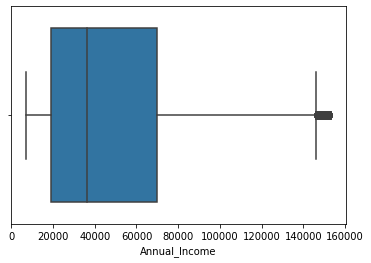

In [ ]:
sns.boxplot(x=df_cleaned['Annual_Income'])

<AxesSubplot:xlabel='Outstanding_Debt'>

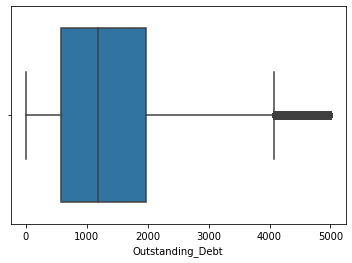

In [ ]:
sns.boxplot(x=df_cleaned['Outstanding_Debt'])

In [ ]:
def remove_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)
    z_score = np.abs((data - mean) / std)
    return data[z_score < threshold]

# CHECKING THE DATA


In [ ]:
occupation_count = df_cleaned['Occupation'].value_counts(dropna = False)
occupation_count

Lawyer           5897
Architect        5712
Engineer         5707
Mechanic         5663
Scientist        5642
Teacher          5610
Accountant       5595
Media_Manager    5587
Entrepreneur     5584
Developer        5576
Journalist       5477
Doctor           5461
Manager          5361
Musician         5327
Writer           5302
Name: Occupation, dtype: int64

In [ ]:
df_cleaned.corr()


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.003278,-0.008286,-0.003320,-0.001866,-0.003388,0.005409,0.001724,0.007550,0.001091,0.003955
Annual_Income,0.003278,1.000000,-0.228448,0.001930,-0.260202,0.198283,0.178919,0.009086,0.314284,-0.002458,0.197813
Delay_from_due_date,-0.008286,-0.228448,1.000000,0.012213,0.570246,-0.377518,-0.334045,-0.004255,-0.081787,0.004711,-0.429993
Num_of_Delayed_Payment,-0.003320,0.001930,0.012213,1.000000,0.009411,-0.006421,-0.007850,0.001585,0.004834,0.000957,-0.007004
Outstanding_Debt,-0.001866,-0.260202,0.570246,0.009411,1.000000,-0.488744,-0.325346,-0.006903,-0.096810,0.001082,-0.386475
Credit_History_Age,-0.003388,0.198283,-0.377518,-0.006421,-0.488744,1.000000,0.298178,0.002849,0.069286,-0.002334,0.300927
Payment_of_Min_Amount,0.005409,0.178919,-0.334045,-0.007850,-0.325346,0.298178,1.000000,0.000842,0.062905,0.001548,0.290160
Total_EMI_per_month,0.001724,0.009086,-0.004255,0.001585,-0.006903,0.002849,0.000842,1.000000,0.003686,0.001519,0.003955
Payment_Behaviour,0.007550,0.314284,-0.081787,0.004834,-0.096810,0.069286,0.062905,0.003686,1.000000,0.003882,0.117812
Monthly_Balance,0.001091,-0.002458,0.004711,0.000957,0.001082,-0.002334,0.001548,0.001519,0.003882,1.000000,-0.001735


,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Score
Age,1.000000,0.003278,-0.008286,-0.003320,-0.001866,-0.003388,0.005409,0.001724,0.007550,0.001091,0.003955
Annual_Income,0.003278,1.000000,-0.228448,0.001930,-0.260202,0.198283,0.178919,0.009086,0.314284,-0.002458,0.197813
Delay_from_due_date,-0.008286,-0.228448,1.000000,0.012213,0.570246,-0.377518,-0.334045,-0.004255,-0.081787,0.004711,-0.429993
Num_of_Delayed_Payment,-0.003320,0.001930,0.012213,1.000000,0.009411,-0.006421,-0.007850,0.001585,0.004834,0.000957,-0.007004
Outstanding_Debt,-0.001866,-0.260202,0.570246,0.009411,1.000000,-0.488744,-0.325346,-0.006903,-0.096810,0.001082,-0.386475
Credit_History_Age,-0.003388,0.198283,-0.377518,-0.006421,-0.488744,1.000000,0.298178,0.002849,0.069286,-0.002334,0.300927
Payment_of_Min_Amount,0.005409,0.178919,-0.334045,-0.007850,-0.325346,0.298178,1.000000,0.000842,0.062905,0.001548,0.290160
Total_EMI_per_month,0.001724,0.009086,-0.004255,0.001585,-0.006903,0.002849,0.000842,1.000000,0.003686,0.001519,0.003955
Payment_Behaviour,0.007550,0.314284,-0.081787,0.004834,-0.096810,0.069286,0.062905,0.003686,1.000000,0.003882,0.117812
Monthly_Balance,0.001091,-0.002458,0.004711,0.000957,0.001082,-0.002334,0.001548,0.001519,0.003882,1.000000,-0.001735


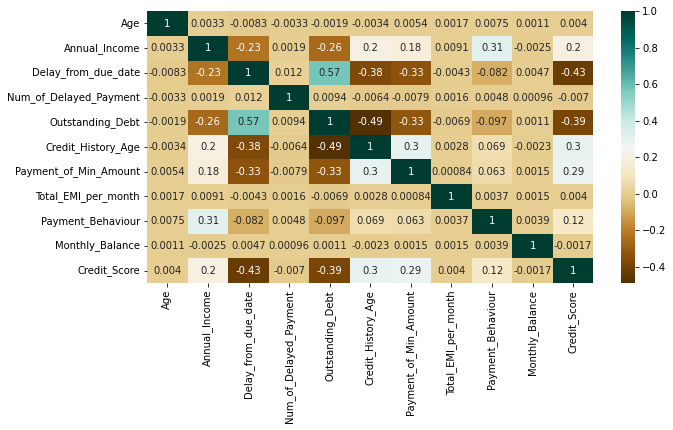

In [ ]:
plt.figure(figsize=(10,5))
c= df_cleaned.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

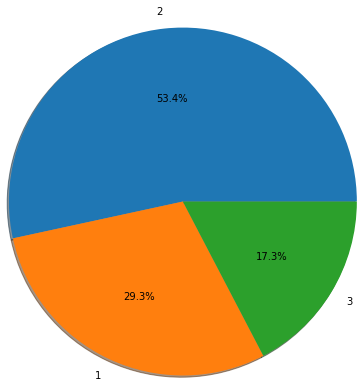

In [ ]:
label = df_cleaned.Credit_Score.value_counts().index
label_count = df_cleaned.Credit_Score.value_counts().values
plt.pie(data=df_cleaned, x=label_count, labels=label, autopct='%1.1f%%', shadow=True, radius=2)
plt.show()

# ENCODING

In [ ]:
df_cleaned = pd.get_dummies(df_cleaned, prefix='Occupation', columns=['Occupation'], drop_first=False)
df_cleaned.head()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,23.0,19114.12,3.0,7.0,809.98,22.1,2,49.574949,4.0,312.494089,...,0,0,0,0,0,0,0,1,0,0
1,23.0,19114.12,-1.0,38.0,809.98,38.0,2,49.574949,3.0,284.629162,...,0,0,0,0,0,0,0,1,0,0
2,-500.0,19114.12,3.0,7.0,809.98,22.3,2,49.574949,2.0,331.209863,...,0,0,0,0,0,0,0,1,0,0
3,23.0,19114.12,5.0,4.0,809.98,22.4,2,49.574949,1.0,223.451310,...,0,0,0,0,0,0,0,1,0,0
4,23.0,19114.12,6.0,38.0,809.98,22.5,2,49.574949,5.0,341.489231,...,0,0,0,0,0,0,0,1,0,0


# NORMALIZATION

In [ ]:
# normalization by using minmax normalization
min_vals = np.min(df_cleaned, axis=0)
max_vals = np.max(df_cleaned, axis=0)

In [ ]:
scaled_data = (df_cleaned - min_vals) / (max_vals - min_vals)

In [ ]:
scaled_data

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
0,0.056860,0.082966,0.111111,0.002273,0.162020,0.580475,1.0,0.000602,0.6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.056860,0.082966,0.055556,0.009318,0.162020,1.000000,1.0,0.000602,0.4,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.082966,0.111111,0.002273,0.162020,0.585752,1.0,0.000602,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.056860,0.082966,0.138889,0.001591,0.162020,0.588391,1.0,0.000602,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.056860,0.082966,0.152778,0.009318,0.162020,0.591029,1.0,0.000602,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0.057078,0.223536,0.347222,0.002045,0.100473,0.828496,1.0,0.000426,0.8,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99995,0.057078,0.223536,0.388889,0.002273,0.100473,0.831135,1.0,0.000426,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99996,0.057078,0.223536,0.319444,0.002273,0.100473,0.833773,1.0,0.000426,0.8,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99997,0.057078,0.223536,0.444444,0.002045,0.100473,0.836412,1.0,0.000426,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# MODEL BUILDING


In [ ]:



# Shuffle your dataset 
shuffle_df = scaled_data.sample(frac=1)

# Define a size for your train set 
train_size = int(0.8 * len(scaled_data))



# Split your dataset 
train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]



In [ ]:
train_set

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
77815,0.057947,0.501410,0.166667,0.002500,0.129112,0.849604,1.0,0.000438,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31194,0.058382,0.016168,0.347222,0.003409,0.355468,0.377309,0.5,0.000217,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
18704,0.057730,0.709327,0.291667,0.004318,0.198782,0.218997,0.5,0.003247,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
52235,0.056534,0.319025,0.152778,0.003182,0.201703,1.000000,0.5,0.000979,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78368,0.058600,0.253359,0.291667,0.005455,0.106832,0.142480,0.5,0.001383,0.8,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92030,0.059687,0.936399,0.125000,0.009318,0.018612,0.739050,0.0,0.000000,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51987,0.057839,0.506175,0.500000,0.005455,0.763326,0.208443,0.5,0.003080,0.8,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51985,0.057730,0.506175,0.500000,0.005909,0.763326,0.184697,0.5,0.003080,0.2,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40382,0.058382,0.008472,0.625000,0.005227,0.521145,0.501319,0.5,0.000303,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
test_set

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,...,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer
12470,0.056317,0.068607,0.277778,0.005455,0.948798,0.094987,0.5,0.000759,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
16537,0.058056,0.473918,0.305556,0.003864,0.113509,0.364116,0.5,0.002469,0.6,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98321,0.057839,0.079290,0.402778,0.003636,0.437379,0.482850,0.5,0.000232,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95540,0.057513,0.060987,0.416667,0.004773,0.633776,0.282322,0.0,0.001116,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1799,0.059143,0.011483,0.722222,0.005455,0.443396,0.369657,0.5,0.000345,0.2,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47546,0.055882,0.002506,0.847222,0.003636,0.455403,0.488127,0.5,0.000106,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
19633,0.059252,0.168279,0.222222,0.004091,0.215571,0.427441,0.5,0.000891,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24544,0.059361,0.156693,0.458333,0.302500,0.223467,0.659894,1.0,0.000000,0.8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4488,0.059796,0.630403,0.263889,0.004318,0.006335,0.691293,1.0,0.000000,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
import random
np.random.seed(42)
class NeuralNetwork:

    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
      #activation function  
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
      # Forward Propogtion
    def forward(self, X):
        # Calculate hidden layer activation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Calculate output layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        
        return self.a2
        #Backward Propogation
    def backward(self, X, y, output):
        # Calculate error at output layer
        self.output_error = y - output
        self.output_delta = self.output_error * self.sigmoid_derivative(output)
        
        # Calculate error at hidden layer
        self.hidden_error = np.dot(self.output_delta, self.W2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.a1)
        
        # Update weights and biases
        self.W2 += self.learning_rate * np.dot(self.a1.T, self.output_delta)
        self.b2 += self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)
        self.W1 += self.learning_rate * np.dot(X.T, self.hidden_delta)
        self.b1 += self.learning_rate * np.sum(self.hidden_delta, axis=0)
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            
    def predict(self, X):
        return np.round(self.forward(X))
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = np.mean(predictions == y)
        return accuracy

# Define training and testing sets
train_set = np.random.randn(100, 5)
test_set = np.random.randint(0, 2, size=(100, 1))


# Create a neural network with 5 inputs, 10 hidden units, and 1 output
nn = NeuralNetwork(input_size=5, hidden_size=10, output_size=1)

# Train the neural network on the training set for 10 epochs
nn.train(train_set, test_set, epochs=10)

# Evaluate the accuracy of the trained model on the testing set
accuracy = nn.evaluate(train_set, test_set)
print("Testing accuracy:", accuracy)


Testing accuracy: 0.52
